In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-27 16:44:11.616498: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-27 16:44:11.652646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-27 16:44:12.184818: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################




df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/André - RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')
df_Lagostim_ind = pd.DataFrame(df[['Ano','Lagostim_ind']])

dados = df_Lagostim_ind.replace(0,np.nan).dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([2008,2009,2010,2011,2012,2013,2014,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Lagostim_ind'].values
dados.head()

,Ano,Lagostim_ind
46,1996,43.0
47,1997,56.0
48,1998,57.0
49,1999,99.5
50,2000,43.0


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=200, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagostim/pesos pesca ind/.weights.h5', overwrite=True)

Epoch 1/200


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9904
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9528
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9262
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8980
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8668
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8313
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7907
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7489
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7091
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6732
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6448
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6261
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6166
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6110
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6058
Epoch 16/200
1/1 ━━━━━━━━━━━━━━━━

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagostim/pesos pesca ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[88.102  ]
 [94.4375 ]
 [98.16322]
 [98.57637]
 [97.71546]
 [93.94406]
 [86.41208]
 [66.38609]]


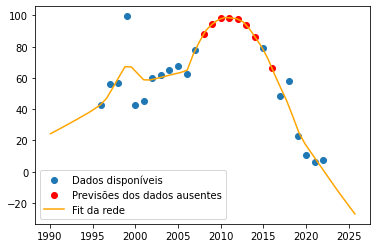

In [6]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

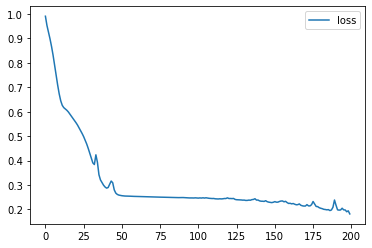

In [7]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [8]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Lagostim_ind':prev_ausentes.flatten()})


df_previsoes.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagostim/Interpolação Lagostim_ind.xlsx')

df_previsoes

,Ano,Lagostim_ind
0,2008,88.101997
1,2009,94.437500
2,2010,98.163223
3,2011,98.576370
4,2012,97.715462
5,2013,93.944061
6,2014,86.412079
7,2016,66.386093
